# plot-two-ocean-layer-EBM-2020

This code plots output from the code two-ocean-layer-EBM-2022. If using the default parameter values given below, the code produces a plot similar to the top row of Figure 3 in Beer, Eisenman, Wagner and Fine (2022; see reference)

E. Beer, I. Eisenman, T.J.W. Wagner and E.C. Fine (2023). A possible hysteresis in the Arctic Ocean due to release of subsurface heat during sea ice retreat. Journal of Physical Oceanography.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

In [2]:
# Default parameter values
F_in = np.zeros(500)  # run F = 0 radiative forcing for 2000 years (W m^-2)
kv_w = 5  # vertical heat flux coefficient when T > 0 (W m^-2 K^-1)
kv_i = 2  # vertical heat flux coefficient when T < 0 (W m^-2 K^-1)
Ds = 0.5  # diffusion coefficient for heat transport in mixed layer (W m^-2 K^-1)
Dd = 0.15  # diffusion coefficient for heat transport in deep layer (W m^-2 K^-1)
A = 192  # OLR when T = 0 (W m^-2)

In [3]:
# import model functions
%run two-ocean-layer-EBM-2022.ipynb

In [4]:
# Run model
x_out, _, T_out, Td_out, Fb_out = two_ocean_layer_EBM_2022(F_in, kv_w, kv_i, Ds, Dd, A)

# Take the last value (year)
T_end = T_out[-1,:]
Td_end = Td_out[-1,:]
Fb_end = Fb_out[-1,:]

# Calculate the surface mixed layer temperature
T_sml = T_end.copy()
T_sml[T_sml<-2] = -2

Year 100 complete
Year 200 complete
Year 300 complete
Year 400 complete
Year 500 complete


Text(0, 0.5, 'Vertical heat flux (W m$^{-2}$)')

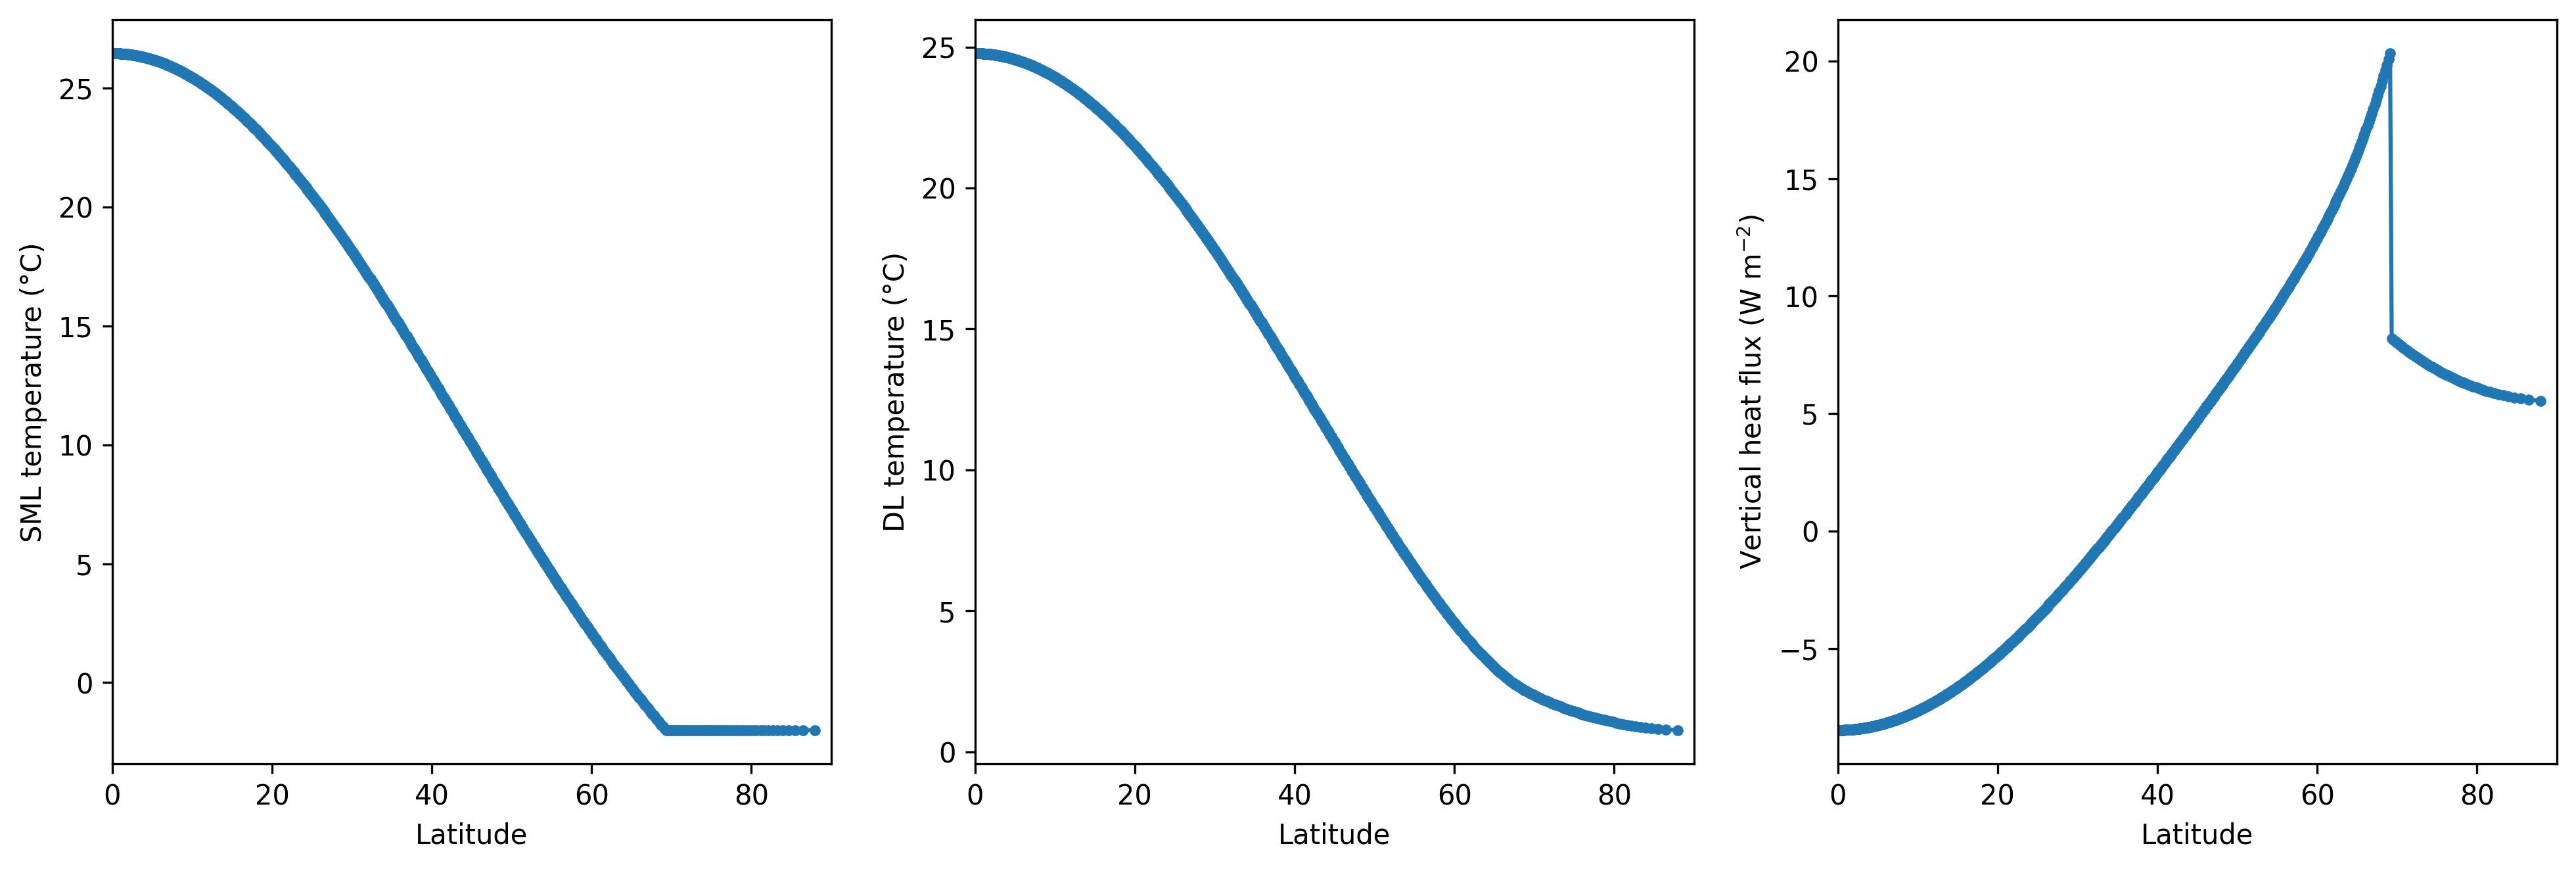

In [5]:
# Set up the figure
plt.figure(figsize=(16, 5))
lat = np.degrees(np.arcsin(x_out))  # latitude N

# Plot the surface mixed layer temperature
plt.subplot(1, 3, 1)
plt.plot(lat, T_sml, '.-')
plt.xlim([0, 90])
plt.xlabel('Latitude')
plt.ylabel('SML temperature (°C)')

# Plot the deep layer temperature
plt.subplot(1, 3, 2)
plt.plot(lat, Td_end, '.-')
plt.xlim([0, 90])
plt.xlabel('Latitude')
plt.ylabel('DL temperature (°C)')

# Plot the vertical heat flux temperature
plt.subplot(1, 3, 3)
plt.plot(lat, Fb_end, '.-')
plt.xlim([0, 90])
plt.xlabel('Latitude')
plt.ylabel('Vertical heat flux (W m$^{-2}$)')